In [3]:
import pandas as pd 
bike_rentals = pd.read_csv("C:/Users/Nicolas/Downloads/bike_rental_hour.csv")
bike_rentals.head()
bike_rentals.shape 

(17379, 17)

(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

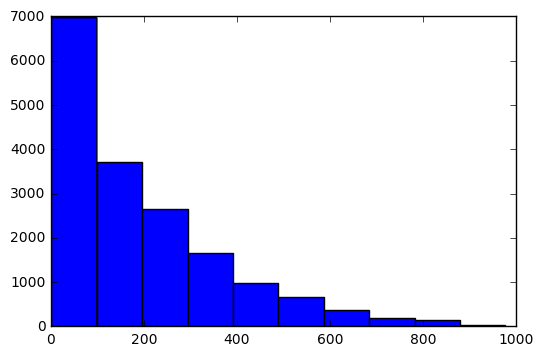

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(bike_rentals["cnt"]) # Take a look at the distribution of total rentals

In [5]:
bike_rentals_corr = bike_rentals.corr()
bike_rentals_corr["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
# Features transformation. Create the time_label column of the bike_rentals dataframe where each label correspond to a certain 
# part of the day such as morning, afternoon, evening, night
def assign_label(hr):
    if (hr > 6) & (hr <=12):
        return 1
    elif (hr > 12) & (hr <=18):
        return 2
    elif (hr > 18) & (hr <=24):
        return 3 
    elif (hr >= 0) & (hr <=6):
        return 4
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In order to evaluate the performance of a machine learning algorithm, I will chose the Root Square Mean Error. I choose this metric because the model will deal with a regression problem and the RSME metric, work well with this problems because show a value that resume the differences between the true value of the target variable(cnt) and the predictions of the model.  

In [7]:
# Select 80% percent of the rows in bike_rentals to be part of the training set
train = bike_rentals.sample(frac= 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [8]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
3574,3575,2011-06-02,2,0,6,20,0,4,1,1,0.70,0.6364,0.24,0.1940,51,286,337,3
4713,4714,2011-07-20,3,0,7,7,0,3,1,2,0.70,0.6667,0.84,0.1045,27,276,303,1
13537,13538,2012-07-23,3,1,7,6,0,1,1,2,0.68,0.6364,0.89,0.0896,9,148,157,4
11968,11969,2012-05-18,2,1,5,21,0,5,1,1,0.60,0.6212,0.40,0.0000,49,209,258,3
13011,13012,2012-07-01,3,1,7,8,0,0,0,1,0.78,0.7424,0.62,0.1045,36,106,142,1


In [9]:
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
22,23,2011-01-01,1,0,1,22,0,6,0,2,0.40,0.4091,0.94,0.2239,11,17,28,3
25,26,2011-01-02,1,0,1,1,0,0,0,2,0.44,0.4394,0.94,0.2537,1,16,17,4
27,28,2011-01-02,1,0,1,3,0,0,0,2,0.46,0.4545,0.94,0.1940,2,4,6,4


In [10]:
# Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ["temp","atemp","hum","season","time_label","weathersit"]
lr = LinearRegression()
lr.fit(train[features],train["cnt"])
predictions = lr.predict(test[features])

error = mean_squared_error(test["cnt"],predictions)
root_square_mean_error = error ** (1/2)
print(predictions)
print(root_square_mean_error)





[ -35.80183871  -35.87391571   40.00390974 ...,  227.06564549  -22.713829
  164.16647641]
139.795175782


The linear regression model, don´t seem to yield good predictions about the number of bike rentals per day. First some predictions values are negatives which is not coeherent with the target variable that must be always positive or 0. 

Secondly, the root mean squared error is a bit high which involves that the this model is far for predicte an accurate value of the number of bicycles rented per day. 

In [11]:
# Applyng Decision Trees to generate a model and compare it with linear regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train[features],train["cnt"])
predictions = model.predict(test[features])

error = mean_squared_error(test["cnt"],predictions)
root_squared_mean_error = error ** (1/2)
print(predictions)
print(root_squared_mean_error)

[  12.66666667   49.           57.33333333 ...,  102.5           2.33333333
   55.        ]
144.488238871


The predictions list that yield the Decision Tree Regressor values  have not negative values of the target variables. However the root squared mean error is higher than in the linear regression model.

When I tweak the min_sample_leaf parameter of the Decision Tree Regressor, and increment up to 20 the error of the model decrease and make a minimun. After the value of 20 of this parameter, the error metric start to increse again.

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train[features],train["cnt"])
predictions = rf.predict(test[features])

error = mean_squared_error(test["cnt"],predictions)
root_squared_mean_error = error ** (1/2)
print(predictions)
print(root_squared_mean_error)


[  10.37428571   16.3452381    98.99047619 ...,  124.525        13.9          71.6       ]
133.894768642


The root squared mean error for the Random Forest Regressor with the defaults parameters is the lowest of the three models that I have been generate. Respect the predictions, the first values are all positive in contrast to the linear regression model where have negative values in the predictions. 

This is in online with the power that have the Random Forests model and it superiority over the linear regression and decision trees. Random Forest tend to overfit much less than decision trees.

In [13]:
# In this step, I will create additional features to include in the model. 
# The weather_index feature is an index that combine the temperature, humidity and wind speed
# and with these variables I generate an index in base 100.

bike_rentals["weather"] = bike_rentals["temp"] + bike_rentals["hum"] + bike_rentals["windspeed"]

bike_rentals["weather_index"] = round((bike_rentals["weather"] / bike_rentals["weather"][0]) * 100,2) 

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label,weather,weather_index
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4,1.05,100.00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4,1.02,97.14
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4,1.02,97.14
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4,0.99,94.29
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4,0.99,94.29


In [14]:
# The variable cnt of the bike_rentals dataset, is the total number of bike rentals (casual + registered) in a single hour of a single day.
# An interesting approach is to predict the amount of casual rented bicycles instead of the total rented bicycles
# I will use the variable casual as the target variables, and select some features to predict it

# Select 80% percent of the rows in bike_rentals to be part of the training set
train = bike_rentals.sample(frac= 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [15]:
bike_rentals["season"].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [16]:
# I will use the RandomForestRegressor to predict the casual bicycles rented in given hour
features = ["weather_index","time_label","workingday","season"]

rf = RandomForestRegressor()
rf.fit(train[features],train["casual"])
predictions = rf.predict(test[features])

error = mean_squared_error(test["casual"],predictions)
root_squared_mean_error = error ** (1/2)
print(predictions)
print(root_squared_mean_error)

[  4.56666667   4.56666667  18.4        ...,   1.33333333  11.91666667
   3.8       ]
35.4590400514


In this model, the root mean squared error is much less respect when we use the cnt variable. This is logical as the casual variable is included in the cnt variable and so their predictions will be more close to the true value, because has less dispersion. 

I conclude for the three model used in this project, that the Random Forest Regressor is the more suitable in predicting the number of bicycles rented in an hour for a given day, because yield the most accurate predictions in comparisson with the Linear Regression or Decision Tree Regressor models.